# National Center for Education Statistics: Gender Gap

<br></br>
<i>The [National Center for Education Statistics](https://nces.ed.gov/) is a part of the Institute of Education Sciences (IES), the research and statistics arm of the US Department of Education. NCES' focus is on education and public school district finance information research. </i>

## Dataset

The Digest of Education Statistics has an annual percentage of baccalaureates granted to women from 1970 to 2012. The dataset uses 17 different degree categories, with each dataset column representing a category. Randal Olson, a data scientist at Life Epigenetics, Inc., cleaned this dataset and made it available on [his personal website](http://www.randalolson.com/). In his study, he explored the gender gap in Science, Technology, Engineering and Mathematics (STEM) fields.

## Goal

The aim is to explore how to effectively communicate the nuanced issue of gender gap using data visualization. In the later part of the notebook, the goal is to extend analysis across all college degrees and create a final diagram as an image file.

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

women = pd.read_csv('datasets/percent_bachelors_degrees_women_usa.csv')

In [2]:
women.head(10).T

,0,1,2,3,4,5,6,7,8,9
Year,1970.000000,1971.000000,1972.000000,1973.000000,1974.000000,1975.000000,1976.000000,1977.000000,1978.000000,1979.000000
Agriculture,4.229798,5.452797,7.420710,9.653602,14.074623,18.333162,22.252760,24.640177,27.146192,29.633365
Architecture,11.921005,12.003106,13.214594,14.791613,17.444688,19.134048,21.394491,23.740541,25.849240,27.770477
Art and Performance,59.700000,59.900000,60.400000,60.200000,61.900000,60.900000,61.300000,62.000000,62.500000,63.200000
Biology,29.088363,29.394403,29.810221,31.147915,32.996183,34.449902,36.072871,38.331386,40.112496,42.065551
Business,9.064439,9.503187,10.558962,12.804602,16.204850,19.686249,23.430038,27.163427,30.527519,33.621634
Communications and Journalism,35.300000,35.500000,36.600000,38.400000,40.500000,41.500000,44.300000,46.900000,49.900000,52.300000
Computer Science,13.600000,13.600000,14.900000,16.400000,18.900000,19.800000,23.900000,25.700000,28.100000,30.200000
Education,74.535328,74.149204,73.554520,73.501814,73.336811,72.801854,72.166525,72.456395,73.192821,73.821142
Engineering,0.800000,1.000000,1.200000,1.600000,2.200000,3.200000,4.500000,6.800000,8.400000,9.400000


In [3]:
women.tail(10).T

,32,33,34,35,36,37,38,39,40,41
Year,2002.000000,2003.000000,2004.000000,2005.000000,2006.000000,2007.000000,2008.000000,2009.000000,2010.000000,2011.000000
Agriculture,47.134658,47.935187,47.887140,47.672754,46.790300,47.605026,47.570834,48.667224,48.730042,50.037182
Architecture,41.132951,42.758543,43.466493,43.100368,44.499331,43.100459,42.711730,43.348921,42.066721,42.773438
Art and Performance,60.900000,61.100000,61.300000,61.400000,61.600000,61.400000,60.700000,61.000000,61.300000,61.200000
Biology,61.895128,62.169456,61.914587,61.500984,60.172845,59.411993,59.305765,58.489583,59.010255,58.742397
Business,50.552335,50.345598,49.950894,49.791851,49.210914,49.000459,48.888027,48.840474,48.757988,48.180418
Communications and Journalism,63.700000,64.600000,64.200000,63.400000,63.000000,62.500000,62.400000,62.800000,62.500000,62.200000
Computer Science,27.000000,25.100000,22.200000,20.600000,18.600000,17.600000,17.800000,18.100000,17.600000,18.200000
Education,78.644244,78.544948,78.650748,79.067122,78.686306,78.721413,79.196327,79.532909,79.618625,79.432812
Engineering,18.700000,18.800000,18.200000,17.900000,16.800000,16.800000,16.500000,16.800000,17.200000,17.500000


## Visualization

Gender gap refers to systemic (social, political, cultural, economic, and intellectual) differences that impact men and women. From an economic standpoint, for instance, the gender gap may be expressed in terms of differentiated treatment towards certain behaviors or attitudes in the workplace, wage disparity, and types of jobs that become available for either gender.

For this dataset, the focus is on education, specifically the bachelor degrees awarded to women since 1970. A look at the sample data above may lead to the following conclusions:

- There is a visible difference between the participation of women in education between the 1970s and the 2000s and beyond. Overall, the data seems to suggest that more women are being awarded degrees.
- Most of the categories — and perhaps, the individual courses within those categories — started with clear gender majorities during the 70s. Some of these imbalanced categories seem to have evened out by the 2000s, including `Architecture`, `Agriculture`, `Biology` and `Business`.
- Some categories clearly dominated by women in the 70s — including `Art and Performance`, `English`, `Foreign Languages`, `Health Professions`, and `Public Administration` — were still dominated by women in the 2000s.
- Some categories clearly dominated by men in the 70s — including `Computer Science` and `Engineering` were still dominated by men in the 2000s.

Instead of going through the numbers one by one to surface patterns, visualizing trends using graphs may aid in making these trends immediately visible. For example, the graph below illustrates the percentage of women awarded with a bachelor's degree in `Biology`.

In [4]:
# figsize, colors, linewidth
figsize=(16,6)
blue = '#154ab6'
pink = '#f0b4dd'
gray = '#cdcdcd'
l = 3

# labels
w = 'Women'
m = 'Men'

### Single Course: Biology

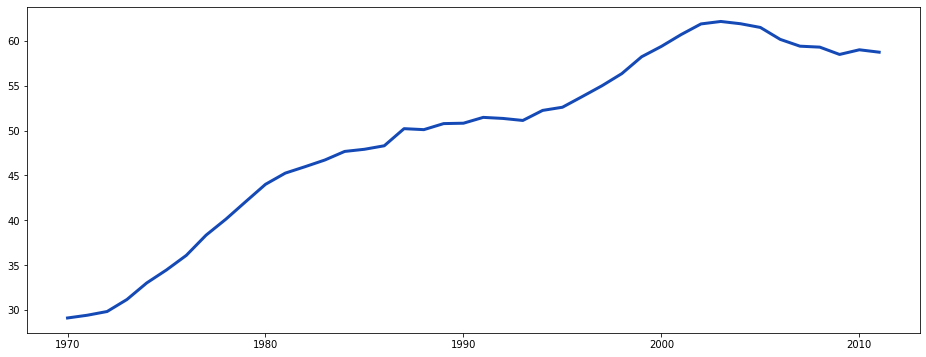

In [5]:
plt.figure(figsize = figsize)
plt.plot(women['Year'], women['Biology'], c = blue, linewidth = l)
plt.show()

From the plot, it is easy to tell that Biology degrees steadily increased over five decades, staying above 50% since around 1987, and peaking in the early 2000's. This plotting, however, only tells half the story. To visualize gender gap, it becomes necessary to include the movement of Biology degrees awarded to men on the same plot.

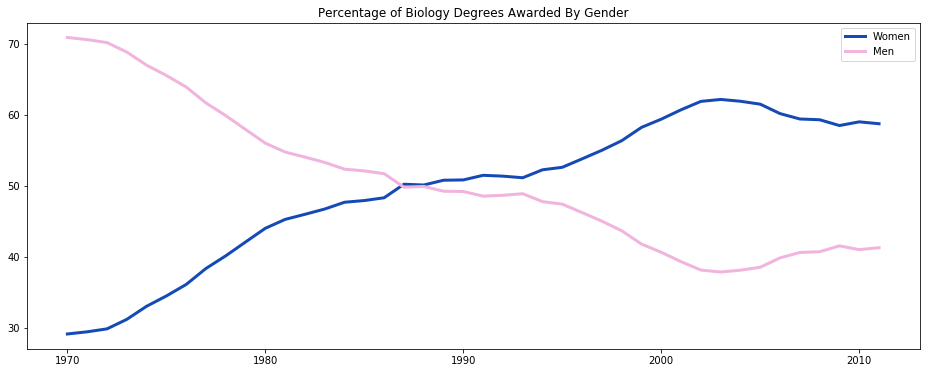

In [6]:
plt.figure(figsize = figsize)
plt.title('Percentage of Biology Degrees Awarded By Gender')
plt.plot(women['Year'], women['Biology'], c = blue, linewidth = l)
plt.plot(women['Year'], 100 - women['Biology'], c = pink, linewidth = l)
plt.legend(labels = (w, m), loc = 'upper right')
plt.show()

The chart above tells a better story than the one before it. The plot seems to have three distinguishable periods: 
- from 1970 - 1984: women were a minority
- from 1984 - 1995: women and men have almost the same percentages
- from 1995 - present: women became a majority

### Multiple Categories: STEM

Let's generate line charts for four STEM degree categories on a grid to encourage comparison. Our instructions for generating the chart are cumbersome. Here's what the final chart looks like, so you can refer to it as you write your code:

In [7]:
figsize=(16,8)

stem = ['Biology', 'Math and Statistics', 'Computer Science', 'Engineering']

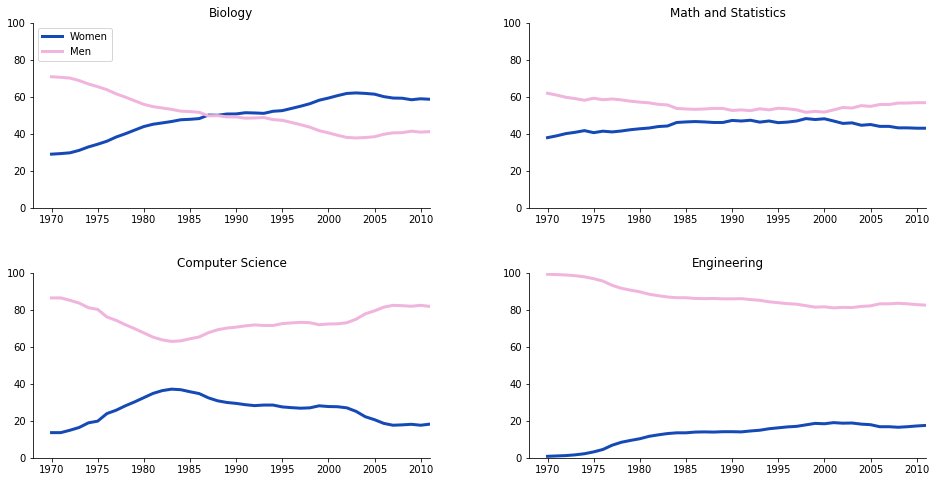

In [8]:
fig = plt.figure(figsize = figsize)

for r in range(0, 4):
    ax = fig.add_subplot(2, 2, r + 1)
    ax.plot(women['Year'], women[stem[r]], c = blue, label = w, linewidth = l)
    ax.plot(women['Year'], 100 - women[stem[r]], c = pink, label = m, linewidth = l)

    ax.set_title(stem[r])
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    
    for i in ['top', 'right']:
        ax.spines[i].set_visible(False)
    if r == 0:
        plt.legend(loc = 'upper left')

plt.subplots_adjust(wspace = 0.25, hspace = 0.35)
plt.show()

Just by looking at the charts, it is easy to conclude that: 
- The gender gap in `Computer Science` and `Engineering` are more evident, with both categories being dominated by men 
- `Biology` and `Math and Statistics` are much more balanced, and the gap is less significant than the previous two

### All Categories

After observing STEM degrees, the next step is to zoom out a bit more, and include all categories in the dataset. For bucketing, the categories have been further classified as either `stem`, `arts` or `other`.

In [9]:
stem.insert(2, 'Physical Sciences')
stem.insert(0, 'Psychology')

In [10]:
other = ['Health Professions', 
         'Public Administration', 
         'Education', 
         'Agriculture',
         'Business',
         'Architecture']

arts = ['Foreign Languages', 
        'English', 
        'Communications and Journalism', 
        'Art and Performance', 
        'Social Sciences and History']

degrees = [stem, other, arts]

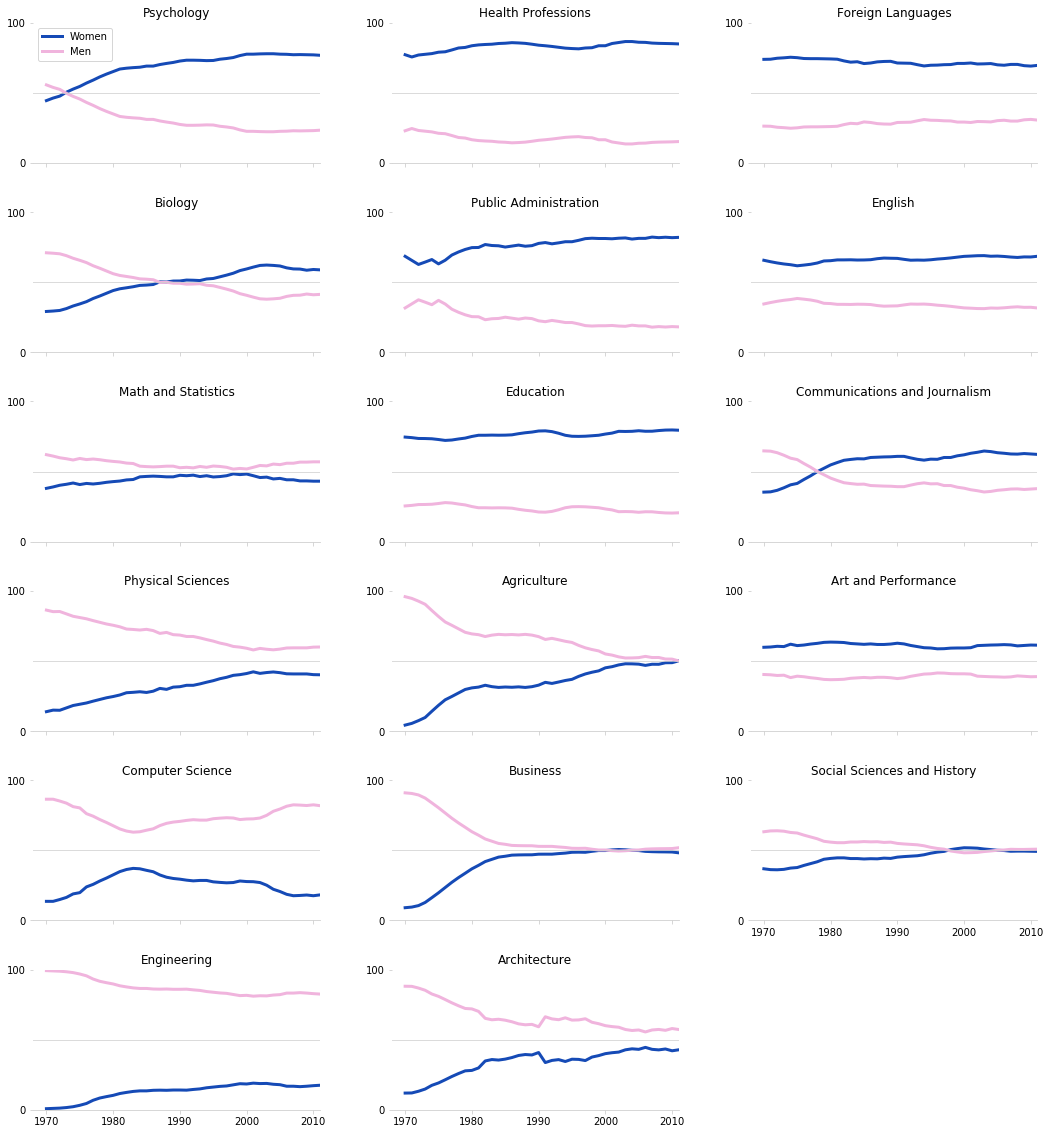

In [11]:
fig = plt.figure(figsize=(18, 20))

for r in range(0, 17):
    i = degrees[r % 3][math.floor(r / 3)]

    # subplots
    ax = fig.add_subplot(6, 3, r + 1)
    ax.plot(women['Year'], women[i], c = blue, label = w, linewidth = l)
    ax.plot(women['Year'], 100 - women[i], c = pink, label = m, linewidth = l)

    # title, lims, hline
    ax.set_title(women[i].name)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.axhline(50, c = gray, linewidth = 1, alpha = 0.7)
    
    # spines
    ax.spines['bottom'].set_color(gray)
    for t in ['top', 'right', 'left']:
        ax.spines[t].set_visible(False)

    # ticks, tick_params
    ax.set_xticks(np.arange(min(women['Year']), max(women['Year']), 10))
    ax.set_yticks([0, 100])
    ax.tick_params(color = gray)
    if r == 0:
        plt.legend(loc = 'upper left')
        ax.tick_params(labelbottom = False)
    elif 0 < r < 14:
        ax.tick_params(labelbottom = False)

plt.subplots_adjust(wspace = 0.25, hspace = 0.35)
# saves an image
plt.savefig('gap_in_college_degrees.png')
plt.show()

Through manipulation of chart elements, it is possible to do a quick high-level review of a specific dataset without going through the actual data. For instance, using the group of charts above, it is easier to arrive at the same conclusions already mentioned in the beginning of the study.

To recap, they are:
- There is a visible difference between the participation of women in education between the 1970s and the 2000s and beyond. Overall, the data seems to suggest that more women are being awarded degrees.
- Most of the categories — and perhaps, the individual courses within those categories — started with clear gender majorities during the 70s. Some of these imbalanced categories seem to have evened out by the 2000s, including `Architecture`, `Agriculture`, `Biology` and `Business`.
- Some categories clearly dominated by women in the 70s — including `Art and Performance`, `English`, `Foreign Languages`, `Health Professions`, and `Public Administration` — were still dominated by women in the 2000s.
- Some categories clearly dominated by men in the 70s — including `Computer Science` and `Engineering` were still dominated by men in the 2000s.